In [1]:
# importing required libraries
import pandas as pd
import numpy as np

In [2]:
#relative path to data
excel = 'data/Online Retail.xlsx'

In [3]:
df = pd.read_excel(excel)
data = df

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [6]:
df.shape

(541909, 8)

There are 25900 unique transactions with 4372 customer over 4070 unique items from 38 unique countries.

## Cleaning the DATA

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
#data where description is null
df[df.isnull().Description].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [10]:
#shape of the data where description is NaN
df[df.isnull().Description].shape

(1454, 8)

we have 1454 entries where description is null so we will remove those enteries

In [11]:
df = df[~df.isnull().Description]
df = df.reset_index(drop=True)#reindexing

deleting the rows where quantity is less than 1

In [12]:
df[df.Quantity < 1].shape

(9762, 8)

In [13]:
df = df[df.Quantity >=1]
df = df.reset_index(drop=True)#reindexing

In [14]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132769
Country             0
dtype: int64

In [15]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [16]:
#some invoiceNo we not number but they containde some alpha charaters getting the count of them
a = df.InvoiceNo 
a = a.unique()
count = 0
alphaInvoice = pd.Series([])
for i in a:
    try:
        float(i)
    except:
        alphaInvoice = alphaInvoice.set_value(count , i)
        count = count + 1
print(count)
print(alphaInvoice)

3
0    A563185
1    A563186
2    A563187
dtype: object


/home/ekansh/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


In [17]:
#checking the main data for alphaInvoices
df[df.InvoiceNo.isin(alphaInvoice)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
293221,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
293222,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
293223,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


as we can see that , the above transactions were of no use they are just populating data and corrupting the Invoice Pattern we will remove it

In [18]:
df = df[~df.InvoiceNo.isin(alphaInvoice)]

In [19]:
df.InvoiceNo = df.InvoiceNo.astype(float)
df.InvoiceNo.dtype

dtype('float64')

In [20]:
df.dtypes

InvoiceNo             float64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

there are lot of customer which do not have any id , so we will generate customer id on the basics of InvoiceNo.
Also we have changed the type of the invoiceId to float64 to match it with the type of CustomerId(also it will make sense as )


but before that we will check that any customer id is equal to invoice number or not

In [21]:
print(pd.Series(df.InvoiceNo.unique()).isin(pd.Series(df.CustomerID.unique())).sum())

0


In [22]:
#total number of unique customers
df.CustomerID.nunique()

4339

In [23]:
#total number of unique invoice where customerId is NaN
df[df.CustomerID.isnull()].InvoiceNo.nunique()

1597

In [24]:
#where the customer id is NaN changing it with the ivoice number so that we get some identity for the customer
# and then the total number of unique customers should be -> 4339 + 1597(= 5936)(if no customerid(present in data) is equal to invoiceId(where customer id is NaN))
df.CustomerID =df.CustomerID.fillna(df.InvoiceNo) 
df.CustomerID.nunique()

5936

In [25]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

All NaN removed successfully Data Cleaned

In [26]:
#final check to check data manually
def uniquePrinter(df):
    x = df.columns
    for i in x:
        print("data for {}".format(i))
        rowData = df[i].unique()
        for j in rowData:
            print(j)
            
#checked

on seeing the data it was observed that some quantites are very large and they should not be taken for prediction.
as they can be from customer who buy item in wholesale , so it is not good to use this data for retail customer and the data should be generalized

In [27]:
import matplotlib.pyplot as plt

{'boxes': [<matplotlib.lines.Line2D at 0x7f84d9fdd240>],
 'caps': [<matplotlib.lines.Line2D at 0x7f84d9fddc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f84d9fc8908>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f84d9fc84e0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f84d9fdd390>,
  <matplotlib.lines.Line2D at 0x7f84d9fdd828>]}

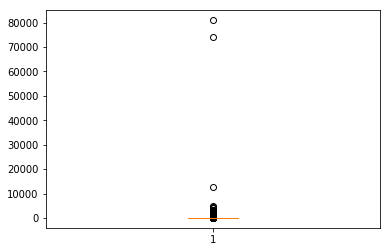

In [28]:
plt.boxplot(df.Quantity)

{'boxes': [<matplotlib.lines.Line2D at 0x7f84dae4e0f0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f84dae4eb00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f84db1047b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f84db104390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f84dae4e240>,
  <matplotlib.lines.Line2D at 0x7f84dae4e6d8>]}

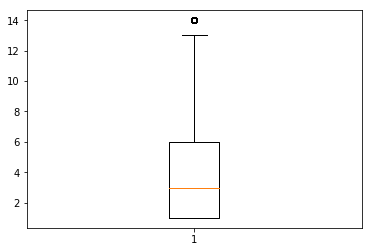

In [29]:
plt.boxplot(df[df.Quantity < 15].Quantity)

In [30]:
df.Quantity.describe()

count    530690.000000
mean         10.605873
std         156.638294
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

Taking the q3(third quartile for boxplot limit) to restrict the data for generalisation

In [31]:
df = df[df.Quantity <= 10*1.5] 

In [32]:
df.Quantity.describe()

count    462235.000000
mean          4.363568
std           3.906049
min           1.000000
25%           1.000000
50%           3.000000
75%           6.000000
max          15.000000
Name: Quantity, dtype: float64

Drastic changes observed : we can see the standar deviation has changed drastically this was due to the outliers , tis issue is resolved

In [33]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,462235.000000,462235.000000,462235.000000,462235.000000
mean,559926.308666,4.363568,4.241586,167218.305198
std,13519.619210,3.906049,34.820771,243738.399964
min,536365.000000,1.000000,0.000000,12347.000000
25%,547772.000000,1.000000,1.250000,14507.000000
50%,560444.000000,3.000000,2.460000,16533.000000
75%,572028.000000,6.000000,4.210000,539738.000000
max,581587.000000,15.000000,13541.330000,581498.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7f84db1fe358>],
 'caps': [<matplotlib.lines.Line2D at 0x7f84db1fed68>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f84db1f5a20>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f84db1f55f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f84db1fe4a8>,
  <matplotlib.lines.Line2D at 0x7f84db1fe940>]}

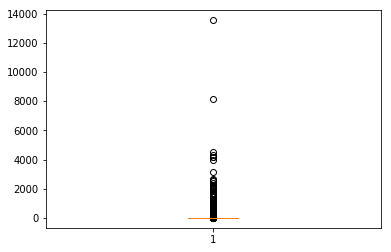

In [34]:
plt.boxplot(df.UnitPrice)

In [35]:
test_df = df.copy()
test_df[test_df.UnitPrice > 100]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
237,536392.0,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,1,2010-12-01 10:29:00,165.00,13705.0,United Kingdom
1801,536544.0,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,536544.0,United Kingdom
3005,536592.0,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,536592.0,United Kingdom
4907,536835.0,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-02 18:06:00,295.00,13145.0,United Kingdom
5358,536862.0,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,536862.0,United Kingdom
5453,536864.0,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,536864.0,United Kingdom
5593,536865.0,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,536865.0,United Kingdom
6073,536876.0,DOT,DOTCOM POSTAGE,1,2010-12-03 11:36:00,887.52,536876.0,United Kingdom
10667,537237.0,DOT,DOTCOM POSTAGE,1,2010-12-06 09:58:00,863.74,537237.0,United Kingdom
11236,537240.0,DOT,DOTCOM POSTAGE,1,2010-12-06 10:08:00,940.87,537240.0,United Kingdom


here we see that majority of over priced items are actually not items they are postages or shipments so we will remove those items : the item stockcode are ('DOT','POST','M','AMAZONFEE','C2')

In [36]:
test = test_df.StockCode == "POST" 

In [37]:
test_df = test_df[~test]

In [38]:
test = test_df.StockCode == "DOT" 

In [39]:
test_df = test_df[~test]

In [40]:
test = test_df.StockCode == "M" 

In [41]:
test_df = test_df[~test]

In [42]:
test = test_df.StockCode == "AMAZONFEE" 

In [43]:
test_df = test_df[~test]

In [44]:
test = test_df.StockCode == "C2" 

In [45]:
test_df = test_df[~test]

In [46]:
test_df[test_df.UnitPrice > 100]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
237,536392.0,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,1,2010-12-01 10:29:00,165.0,13705.0,United Kingdom
4907,536835.0,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-02 18:06:00,295.0,13145.0,United Kingdom
19128,537859.0,22828,REGENCY MIRROR WITH SHUTTERS,1,2010-12-08 16:11:00,165.0,14030.0,United Kingdom
19129,537859.0,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,2,2010-12-08 16:11:00,145.0,14030.0,United Kingdom
24652,538354.0,22826,LOVE SEAT ANTIQUE WHITE METAL,2,2010-12-10 15:45:00,175.0,16873.0,United Kingdom
28318,538662.0,22655,VINTAGE RED KITCHEN CABINET,2,2010-12-13 15:44:00,125.0,15159.0,United Kingdom
28354,538662.0,22656,VINTAGE BLUE KITCHEN CABINET,2,2010-12-13 15:44:00,125.0,15159.0,United Kingdom
30975,538999.0,22655,VINTAGE RED KITCHEN CABINET,2,2010-12-15 12:09:00,125.0,16003.0,United Kingdom
30976,538999.0,22656,VINTAGE BLUE KITCHEN CABINET,2,2010-12-15 12:09:00,125.0,16003.0,United Kingdom
31212,539016.0,22655,VINTAGE RED KITCHEN CABINET,2,2010-12-15 13:49:00,125.0,13418.0,United Kingdom


In [47]:
test_df.UnitPrice.describe()

count    459971.000000
mean          3.531848
std           4.489864
min           0.000000
25%           1.250000
50%           2.460000
75%           4.150000
max         649.500000
Name: UnitPrice, dtype: float64

we can see that the standard deviation has dropped drastically

the last thing to check is that min unit price is 0 which has description of amazon and post , also it sounds logical that no mart will sell items for free.so we will remove this.


In [48]:
test_df = test_df[~(test_df.UnitPrice == 0)]

In [49]:
test_df.shape

(459517, 8)

In [50]:
df = test_df.copy()

In [51]:
df.to_csv("./data/finalData.csv",index=False)